# <center>Data Science Project<br/>Deliverable 3: Image processing</center>

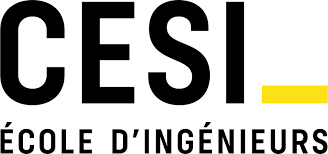

<p>Group: MATOKA FOUNA Ulrich-Tessa, OULD SLIMANE Arslane, Lilou RABOUILLE, </br> TURKI Salma, YEMALEU WOTCHEU Jocelyn</p>

---

## Table of Contents

- [Introduction](#introduction)
  - [Contextualization](#contextualization)
    - [Context](#context)
    - [Project presentation](#project-presentation)
  - [Team structure](#team-structure)
  - [Organization](#organization)
- [Full architecture](#full-architecture)
- [Environment initialization](#environment-initialization)
  - [Download project requirements](#download-project-requirements)
  - [Import project libraries](#import-project-libraries)
  - [Enable GPU usage](#enable-gpu-usage)
- [Image preprocessing](#image-preprocessing)
- [Image classification](#image-classification)
- [Image denoising](#image-denoising)
- [Image captioning](#image-captioning)
  - [Loading the COCO dataset](#loading-the-coco-dataset)
  - [Pre-processing for image captioning](#pre-processing-for-image-captioning)
    - [Annotation pre-processing](#annotation-pre-processing)
    - [Formation of a training and test set](#formation-of-a-training-and-test-set)
  - [Image captioning model](#image-captioning-model)
    - [CNN encoder](#cnn-encoder)
    - [Attention mechanism](#attention-mechanism)
    - [RNN decoder](#rnn-decoder)
    - [Complete model with encoder and decoder](#complete-model-with-encoder-and-decoder)
    - [Model training](#model-training)
    - [Model evaluation](#model-evaluation)
- [Full pipeline](#full-pipeline)
  - [Full pipeline code](#full-pipeline-code)
  - [Pipeline function test](#pipeline-function-test)
- [Conclusion](#conclusion)
- [References](#references)

## Introduction

### Contextualization

#### Context
In a world where data management is becoming crucial, digitization and automatic document analysis are at the heart of innovation. A company aims to automate the processing of digitized images by developing a solution based on artificial intelligence to automatically generate descriptive captions, thus improving the management and enhancement of visual data.

**TouNum** is a company that specializes in digitizing paper documents and converting them into digital format. Faced with growing demand from its customers, who have large quantities of documents to digitize, the company wishes to expand its services by integrating **Machine Learning** tools to automate the classification and generation of captions for digitized images. Pour cela, il ont fait appel à notre équipe, les spécialistes en Data Science de CESI.

![alt text](img/image_caption.png)

#### Project presentation
Image captioning provides a powerful solution for automating the description of images. It can enhance data management, especially in scenarios like TouNum’s, where large volumes of visual content need to be efficiently processed. It improves accessibility, retrieval, and categorization of images while adding value to digitized data by creating meaningful, descriptive captions. The potential applications are vast, ranging from image retrieval to enhanced multimedia experiences.

__Objectives__
1.	Develop a neural network model that combines a CNN for extracting visual features and an RNN for generating captions.
2.	Preprocess images using a pre-trained CNN to ensure accurate feature extraction.
3.	Train the model on the MS COCO dataset to capture relationships between images and their captions.
4.	Evaluate the model’s performance to ensure it generates high-quality, relevant captions.

__Challenges__
1.	Image and Caption Variability: Handling the diverse range of images and captions poses a challenge for the model to learn accurate associations.
2.	Generating Appropriate Descriptions: Ensuring the model generates coherent and contextually correct sentences is crucial.
3.	Overfitting and Generalization: Avoiding overfitting while training the model so that it generalizes well to new, unseen images.
4.	Data Preprocessing: Proper image preprocessing is essential to maximize the quality of the extracted features used for caption generation.

### Team structure
- <u>MATOKA FOUNA Ulrich-Tessa</u>: Machine learning model tester

- <u>OULD SLIMANE Arslane</u>: Machine learning model tester

- <u>RABOUILLE Lilou</u>: Project Manager

- <u>TURKI Salma</u>: Machine learning model tester and redacter

- <u>YEMALEU WOTCHEU Jocelyn</u>: Research Analyst and documenter

### Organization
TouNum has given us 5 weeks to deliver a working prototype, in the form of a Jupyter notebook, which will then be evaluated by the R&D manager and the company director. To organize ourselves as well as possible over this short period, our team will be using the [Notion](https://www.notion.so/fr) tool. 

This tool will enable us to define and share tasks, monitor progress and visualize the project timeline, among other functions. Here's an extract from our task board:

<div style="text-align: center;">
    <img src="img/notion_tasks.png" alt="Team project board" style="max-width: 60%; height: auto;" />
</div>

## Full architecture
To meet this demand, TouNum would first like to sort the data into two categories: photos and other types of images.

Secondly, the company wants to clean up the data. Indeed, the images to be digitized can be of variable quality (blurred, noisy). So we want to clean them up.

Finally, we want to generate descriptive captions from these images, which are then clear photos.

The requested workflow would then take the following form:

<div style="text-align: center;">
    <img src="img/project_architecture.png" alt="Project Workflow" style="max-width: 70%; height: auto;" />
</div>

As a group we chose to interpret this workflow as follows:

<div style="text-align: center;">
    <img src="img/pipeline_high_level.png" alt="Full pipeline" style="max-width: 50%; height: auto;" />
</div>

The pipeline for our project represents a structured workflow for generating captions for images, beginning with two primary inputs: the captions (text data) and the images themselves, which are processed in parallel before converging for the final caption generation task. Initially, the captions undergo text preprocessing, involving cleaning, character removal, conversion to lowercase, tokenization, and encoding into numerical values, ensuring a standardized format for training the captioning model. Simultaneously, the images are preprocessed to ensure uniformity and quality through resizing, normalization, and other transformations. The next step involves image classification, where the system distinguishes between photos (relevant for processing) and non-photos (like documents). If an image is classified as a photo, it proceeds directly; if not, it undergoes a separate denoising process and is reclassified to prevent the loss of useful data. Both categories are then denoised to remove irrelevant data, enhancing the input quality essential for classification and caption generation. Following denoising, the captioning process takes place, utilizing a pre-trained Convolutional Neural Network (CNN) to extract meaningful features from the images, which are encoded into dense vector representations. These features are then passed to a Recurrent Neural Network (RNN), such as LSTM or GRU, which generates descriptive captions based on the visual features, potentially enhanced by an attention mechanism to focus on different image parts. Finally, the generated captions are evaluated using metrics like the BLEU score, comparing them to human-written captions to assess quality and accuracy. This automated pipeline, from preprocessing to evaluation, ensures that each image receives a meaningful and contextually accurate description.

## Environment initialization

### Download project requirements
To ensure that all the team working on the project, as well as the people who want to run the code, use the same virtual environment, we use the `requirements.txt` file. This is a list of the Python packages that need to be installed in a virtual environment for the application to run correctly. 

To run the code, create and activate a virtual environment, then run the following cell.

In [27]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import project librairies

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential, Model
from onedrivedownloader import download
import os
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
import datetime
import requests
from tensorboard.plugins.hparams import api as hp
import visualkeras
import zipfile
import json
from tqdm import tqdm
import nltk
import collections
import time

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lilou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Enable GPU usage

In [29]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        # Enable memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

[]


Now that the project environement is all set up, it is important to definie the step of the pipeline.

## Image preprocessing
Image preprocessing is a crucial initial step in image-related machine learning projects, especially for image captioning and classification tasks. It transforms raw image data into a suitable format for model input, ensuring consistency in dimensions, color channels, and overall quality. Effective preprocessing greatly influences machine learning model performance by preparing images that accurately represent the features for learning.

## Image classification
The pipeline goal is to caption, not any images, but specifically photos. For that matter, we'll be using a classification model. After many trials and errors, the team decided on a multiclass classifier model architecture that was giving the best result in differenciating photos from other types of images, even among binairy classifiers.

The model is composed of :
- Input layer: Rescaling the input images from their raw pixel values.
- Convolutional layers: 5 convolutional layers (Conv2D) that progressively learn filters to extract spatial features from the input images, with the following number of filters [`16`, `32`, `64`, `128`, `256`].
- Max Pooling layers: After each convolutional layer, max pooling is applied to reduce the spatial dimensions of the feature maps and to capture the most important features.
- Dropout layer: Dropout is applied to reduce overfitting by randomly deactivating 10% of the neurons during training.
- Fully connected layers: A dense layer of `384 units` followed by a dense output layer with `5 units` corresponding to the 5 different image types (Photo, Painting, Schematics, Sketch, and Text).

We used as regularization techniques, L2 and a Dropout layer. L2 is set as `0.0001` and dropout as `0.1`.


The results are as followed:

<div style="text-align: center;">
    <img src="img/confusion_matrix_classifier.png" alt="Confusion matrix multiclass classifier" style="max-width: 40%; height: auto;" />
</div>

It shows that more than 90% of the photo are correctly recognized as such.

The model can be access from the path `./models/image_classification_model.keras`.

## Image denoising
In case of noisy image, the pipeline need to be able to denoise them in order to correcty caption  the photos. In order to denoise the photos, a denoising autoencoder has been created. 

The model chosen is composed of:
- Encoder
    - Conv2D Layer (32 filters): The first layer of the encoder is a convolution layer with 32 filters, each of size (3, 3), ReLU activation, and same padding. This layer extracts low-level features.
    - BatchNormalization Layer: Normalizes the activations to stabilize and speed up training.
    - Conv2D Layer (64 filters): Another convolutional layer with 64 filters, (3, 3) kernel size, same padding, ReLU activation, and a stride of (2, 2) to reduce spatial dimensions by half.
    - Conv2D Layer (128 filters): A convolutional layer with 128 filters, similar to the previous layer, but it further reduces the spatial dimensions by half again with a stride of (2, 2).
    - Conv2D Layer (256 filters): The final layer of the encoder has 256 filters, (3, 3) kernel size, ReLU activation, and same padding. This layer captures complex, high-level features from the input image.
- Decoder
    - Conv2DTranspose Layer (128 filters): The first layer of the decoder performs a transposed convolution with 128 filters, (3, 3) kernel size, ReLU activation, same padding, and a stride of (2, 2) to upsample the encoded image.
    - Conv2DTranspose Layer (64 filters): Another transposed convolution layer with 64 filters, same padding, ReLU activation, and a stride of (2, 2) to further upsample.
    - Conv2D Layer (32 filters): A convolutional layer with 32 filters to refine the upsampled image.
    - Conv2D Layer (3 filters): The final output layer with 3 filters and sigmoid activation to reconstruct the denoised image. The sigmoid function ensures the pixel values are scaled between 0 and 1.

In this architecture, we seek to capture even more complex information in noisy images. The latter also seeks to reconstruct a noisy version of an image via a series of convolutions in the encoder. However, we subsequently use a convolution transposition operation (`keras.layers.Conv2DTranspose`) in the decoder.

The first layer of this encoder is a classic covolution layer containing 32 filters. However, the second layer is a [batch normalization layer](https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739) (`keras.layers.BatchNormalisation`) which will stabilize the training. In fact, this is a technique that will solve certain problems linked to training, such as the [__covariate shift__](https://www.seldon.io/what-is-covariate-shift#:~:text=Covariate%20shift%20occurs%20when%20the,accuracy%20will%20be%20significantly%20lower.).

Batch Normalization normalizes a layer's neuron activations by calculating the __mean__ and __standard deviation__ of activations over a batch of examples. Each neuron in the layer receives inputs that are scaled and refocused, helping to __reduce the variance__ of activations between different layers of the network.

Our encoder also includes 2 convolution layers in which __strides__ will reduce the spatial dimension. These stripes designate the way in which the convolution filter moves over the image. A stride of `(2, 2)` as in our model means that the filter moves 2 pixels each time (horizontally and vertically), instead of 1 pixel. This reduces the size of the image by half after each convolutional layer, without adding any extra computation.

Here we use it instead of pooling, because although pooling layers are useful for reducing dimensionality and computation time, they can lead to information loss and increased complexity. In the case of the architecture you're using, the use of strides enables dimensional reduction while retaining some of the relevant information, which can potentially improve model performance.

The last layer of the encoder passes an encoded representation of the reduced-size image to the decoder, which is made up of convolution transposition layers that work like the inverse of normal convolutions, while increasing the image size with strides (like the upsampling seen previously).

While this architecture contains many positive points, such as the use of Batch Normalization and Strides, a more parametric approach than maxpooling, it also has the weakness of accumulating parameters via convolutions and convolutional transpositions. What's more, the number of layers and their large number of filters will increase the time and complexity of the model.


## Image captioning
The aim of this section is to prepare the data, through pre-processing, so that a model can be trained on the image captioning task. The image captioning task consists in taking an image as input and giving, as output, a “sentence” describing what this image contains. This can be considered a sequence-to-sequence problem, as it transforms an image, seen as a sequence of pixels, into a sequence of words. This requires processing both __language__ and __images__.

To tackle this problem efficiently, we make use of transfer learning. Transfer learning allows us to leverage a model that has already been pre-trained on a large dataset, such as ImageNet, and apply the knowledge it has gained to a new, related task. Instead of training a neural network from scratch, which requires a lot of __time__ and __data__, transfer learning enables us to use a pre-trained CNN to extract meaningful image features, which can then be fine-tuned for our specific image captioning task.

He distinguishes three main types of Transfer Learning:

1. __Inductive transfer learning__: The source and target domains are identical, but the tasks differ. For example, a model for detecting animals can be adapted to identify dogs.
2. __Unsupervised transfer learning__ : Domains are similar, but data are not labeled. This method makes it possible to exploit large quantities of unlabeled data, as in self-taught clustering.
3. __Transductive transfer learning__: The tasks are similar, but the domains differ. One example is the adaptation of NLP models trained on news data to social network data.

Transfer Learning is applied in Deep Learning mainly via pre-trained models. Two strategies are used in transfer learning. The first is the use of pre-trained models as feature extractors. In this approach, the first layers of a pre-trained neural network are used to extract general features from the data. These layers capture low-level information, such as edges and textures, which can be useful for a variety of tasks. Once these features have been extracted, they can be used to train a new model on a specific task, without the need to re-train the entire network.

The second strategy is pre-trained model fitting, where the last model layer is replaced and some layers are selectively re-trained. This method enables the model to be fine-tuned for a particular task, while retaining the knowledge acquired by the pre-trained network.

<div style="text-align: center;">
    <img src="https://db0dce98.rocketcdn.me/wp-content/uploads/2020/07/Capture-d%E2%80%99e%CC%81cran-2020-07-21-a%CC%80-08.45.58.png" alt="Transfer Learning strategies" style="max-width: 50%; height: auto;" />
</div>

In our project, we implemented the first strategy of transfer learning using pre-trained models like InceptionV3 and ResNet50, trained on the ImageNet dataset. This approach involves retaining most layers of the pre-trained model while replacing the final output layer with one tailored for our task.

To process the images, we're going to train a model consisting of a CNN pre-trained on ImageNet to encode images from a dataset called COCO into embeddings, followed by a RNN which will serve to decode the embedding and output the textual description of the image. This training represents a typical example of transfer learning.

How does it work?

Let's take the following image as an example.


<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*myPdfDo7smjVYYh9en-kMQ.jpeg" alt="Photo of a brown dog" style="max-width: 50%; height: auto;" />
    <p><em>Photo by Isabela Kronemberger on Unsplash : Fig 1</em></p>
</div>

When we want to describe this image, we can say “A brown dog on a blue towel” or, “A puppy playing with a green ball”. We then recognize the elements of the image before creating a sequence of words corresponding to what we've annotated. This is why we're going to use a CNN for the first part and an RNN for the linguistic part.

We can train networks to automatically caption images with an appropriate dataset of images and their corresponding human descriptions. The COCO dataset can be used for this purpose. 

However, assessing the quality of the descriptions generated poses a challenge, as an image can be described in many different ways. For this purpose, the BLEU score can be used. This is a metric that compares generated sentences with reference sentences. We'll go into more detail later.

### Comparaison of different models
Our team divided up the work to experiment with different architectures for image captioning. The aim is to find the model that constructed the best captions and formed correct sentences. We test the models and register our results to make a decision. Note that each result was obtained with the parameters:

- Batch size: 32
- Number of epochs: 20
- 5000 images
- 5000 words of vocabulary
- Embedding size: 256
- Hidden layer size: 512
- Optimizer: Adam
- Loss function: Sparse Categorical Crossentropy
- Attention mechanism: Bahdanau

<em style="color:red">We chose them according to the capacity of our machines. Indeed, a single model with 20 epochs and 5000 images requires too many resources and therefore too much execution time to train.</em>

The parameters that we decided to change in order to find the best model where:
- The RNN arcvhitecture (LSTM or GRU)
- The number of layers (1 or 3)
- The pretrained CNN model (InceptionV3 or ResNet)

These parameters are not enough for our model to get good captions. Once we find the best model in this situation, we will optimize it by running it on more epochs, and more images.

|Model|Description|Execution time|AVG BLEU score 1-gram|AVG BLEU score 2-gram|AVG BLEU score 3-gram|Loss|
|:---:|:---------:|:------------:|:-------------------:|:-------------------:|:-------------------:|:--:|
|[Model_0](#)|Bidirectional LSTM with ResNet|++++|0.994|0.000|0.000|0.2617|
|[Model_1](#)|GRU 1 layer with ResNet|+|0.103|0.000|0.000|0.316|
|[Model_2](#)|GRU 3 layers with ResNet|++|0.097|0.000|0.000|0.474|
|[Model_3](#)|LSTM 1 layer with ResNet|+|0.113|0.00002|0.000|0.287|
|[Model_4](#)|GRU 3 layers with InceptionV3|++|0.093|0.000|0.000|0.404|
|[Model_5](#)|LSTM 1 layer with InceptionV3|++|0.091|0.291|0.435|0.272|
|[Model_6](#)|GRU 1 layer with InceptionV3|+|0.913|0.283|0.420|0.374|
|[Model_7](#)|LSTM 2 layers with ResNet, l2 regularization:, learnig rate:1e-4|++|0.088|0.000|0.00|0.540|


After a large number of experiments, we observe that the model with a 1-layer LSTM RNN and using InceptionV3 is better than the others over 20 epochs. We even calculated 4-grams for this model and got 0.527. This means that the model can, not even use correct words, but also correctly form sentences.

We will explain each technique (pretrained models, RNN architecture...) in more detail below.

### Loading the COCO dataset
The __COCO (Common Objects in Context)__ dataset is one of the most widely used computer vision datasets, particularly for tasks such as __object detection__, __image segmentation__, __object recognition__ and __captioning__ (generating textual descriptions of images).

This dataset helps researchers to develop and test computer vision models. It is designed to contain realistic images that reflect everyday scenes, where objects appear in their natural context.

It contains annotated images, where each image is accompanied by several annotations. These annotations include :
- __legends__ (text descriptions) for captioning.
- Bounding boxes for object detection.
- Segmentation masks__ for image __segmentation__ (which specify the exact
exact contours of objects).
- Keypoints for tasks such as human pose detection.
poses.

COCO contains : 
- over __330,000 images__. Of these, around 200,000 images are annotated for object detection, and around 123,000 images are annotated for image captioning.
- about __80 categories of common objects__, such as people, cars, animals, household appliances, etc. This makes it possible to study object recognition on a wide variety of real-world elements.
- __legends__. Each image in the COCO dataset is accompanied by several captions created by human annotators. In general, each image has between 5 and 7 textual descriptions, making it particularly suitable for the captioning task.

<div style="text-align: center;">
    <img src="https://cdn.prod.website-files.com/614c82ed388d53640613982e/635b9f177187c8ec7654e78d_6320785b1a83ddece4d3ee63_COCO-dataset.png 
    " alt="COCO dataset" style="max-width: 100%; height: auto;" />
</div>

As mentioned above, the COCO dataset is widely used for various computer vision tasks: object detection, where bounding boxes are used to identify the presence and position of objects in an image, semantic segmentation, instance segmentation... However, the focus here is on its use for __captioning images__, a task where automatic text descriptions are generated from images thanks to its rich annotations.  

Let's download this dataset.

#### Data download
Let's start by downloading the datasets to ensure that we have the necessary resources to train our image caption model.

In [38]:
import os
import zipfile
import urllib.request

# URLs for downloading the datasets
annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2014.zip"
train2014_url = "http://images.cocodataset.org/zips/train2014.zip"

# Local paths
annotation_folder = os.path.join("transfer_learning", "annotations")
train2014_folder = os.path.join("transfer_learning", "train2014")
annotation_zip = os.path.join("transfer_learning", "annotations.zip")
train2014_zip = os.path.join("transfer_learning", "train2014.zip")

# Create transfer_learning folder if it doesn't exist
if not os.path.exists("transfer_learning"):
    os.makedirs("transfer_learning")

# Download and unzip annotations if not already downloaded
if not os.path.exists(annotation_folder):
    print(f"Downloading {annotations_url}...")
    urllib.request.urlretrieve(annotations_url, annotation_zip)
    
    # Unzip the file
    print(f"Unzipping {annotation_zip}...")
    with zipfile.ZipFile(annotation_zip, 'r') as zip_ref:
        zip_ref.extractall("transfer_learning")
        
    # Delete the zip file
    print(f"Deleting {annotation_zip}...")
    os.remove(annotation_zip)
else:
    print(f"{annotation_zip} already exists, skipping download.")

# Download and unzip train2014 if not already downloaded
if not os.path.exists(train2014_folder):
    print(f"Downloading {train2014_url}...")
    urllib.request.urlretrieve(train2014_url, train2014_zip)
    
    # Unzip the file
    print(f"Unzipping {train2014_zip}...")
    with zipfile.ZipFile(train2014_zip, 'r') as zip_ref:
        zip_ref.extractall("transfer_learning")
    
    # Delete the zip file
    print(f"Deleting {train2014_zip}...")
    os.remove(train2014_zip)
else:
    print(f"{train2014_zip} already exists, skipping download.")

transfer_learning\annotations.zip already exists, skipping download.
transfer_learning\train2014.zip already exists, skipping download.


#### Loading data
In the context of image captioning, we need to extract numerous compact visual features from images. This information will then be used to guide the generation of captions for our images (via an RNN). Deciding on the model that will execute this task is primordial to know in which format we need the images. We can use [InceptionV3](https://paperswithcode.com/method/inception-v3).

InceptionV3 is a convolutional neural network that has been pre-trained on a dataset called `ImageNet`. The `Imagenet` dataset is provided in keras and used for classification. It contains more than 14 million images in the dataset, with little more than 21 thousand groups or classes.

Being trained on `ImageNet`, InceptionV3 is capable of recognizing and extracting thousands of features from an image. Since InceptionV3 is pre-trained, we can use its final classification layer to retrieve the compact representation of the image (matrix `8x8x2048`), which will facilitate the image's entry into the RNN decoder phase. When using InceptionV3, we need the image to be sized at `299x299`.

<div style="text-align: center;">
    <img src="img/inceptionv3_architecture.png" alt="InceptionV3 architecture" style="max-width: 100%; height: auto;" />
</div>

<div style="text-align: center;">
    <img src="img/sequentialize_data.webp" alt="Sequential data preparation with InceptionV3" style="max-width: 100%; height: auto;" />
</div>

However, there are other alternatives to using InceptionV3. These include [ResNet](https://paperswithcode.com/method/resnet) (Residual Networks), also pre-trained on `ImageNet`.

ResNet introduces residual blocks, which allow information to flow directly from one layer to another, bypassing certain intermediate layers. This makes it easier to learn deeper features without the model becoming too complex. These residual blocks also enable ResNet to have a deep architecture (up to 152 layers) while remaining computationally efficient. This means it can learn richer representations of images without requiring excessive computational resources. When using ResNet, we need the image to be sized at `224x224x3`

<div style="text-align: center;">
    <img src="img/ResNets_layers.png" alt="ResNet residual layels" style="max-width: auto; height: 200px;" />
</div>

Below is the table showing the layers and parameters in the different ResNet Architectures.

<div style="text-align: center;">
    <img src="https://lh3.googleusercontent.com/NPuDMZDi_u7AtBmXUJEgYJQTVEkC6fBGi-lMJqQMIZeuExuxLRS2rXGFStBp_n_OeoBn9_ds413Yk-GDl3JvRb7N_FG5JI7JX11xt5zPaXysSYlb5NyQLCzqzp_jolPn_bBExmEs" alt="ResNet architecture table" style="max-width: 70%; height: auto;" />
</div>

ResNet's structure integrates well with sequential models such as `LSTM`, enabling a smooth flow of data between visual feature extraction and caption generation. It is also easy to optimize and achieve higher accuracy when the depth of the network increases, producing results that are better than previous networks.

Numerous scientific papers are regularly posted on the subject of ResNet, as can be seen in the graph below. We can also find other usable architectures that we unfortunately won't have time to test.

<div style="text-align: center;">
    <img src="img/usage_inceptionv3_resnet.png" alt="InceptionV3, ResNet and others usage over time" style="max-width: 50%; height: auto;" />
</div>

The following code is going to process images annotations and extract the features usig the pre-trained deep learning model of our choosing.

It will start by loading the image captions and formatting them with `<start>` and `<end>` tokens. Then it will select the first `25 000` images.

The following code allows us to choose `InceptionV3` and `ResNet50` for feature extraction. The code loads the selected pre-trained model without the classification layer and defines the necessary preprocessing function. It then creates a Keras model to extract features from the images.

Based on our [tests](#comparaison-of-different-models), we'll choose to use `InceptionV3` here.

The processed images are paired with their paths, and a TensorFlow dataset is created to manage loading and preprocessing in batches.

Finally, the code iterates over the dataset in batches, extracting features from each batch using the pre-trained model.

In [39]:
# Annotation file path
annotation_file = os.path.join(annotation_folder, "captions_train2014.json")

# Lecture du fichier d'annotation
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# Group all annotations with the same identifier.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    # mark the beginning and end of each annotation
    caption = f"<start> {val['caption']} <end>"
    # An image's identifier is part of its access path.
    image_path = os.path.join(train2014_folder, 'COCO_train2014_' + '%012d.jpg' % (val['image_id']))
    # Add caption to image_path
    image_path_to_caption[image_path].append(caption)
    
# Take first images only
image_paths = list(image_path_to_caption.keys())
train_image_paths = image_paths[:25000]

# List of all annotations
train_captions = []
# List of all duplicated image file names (in number of annotations per image)
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    # Add caption_list to train_captions
    train_captions.extend(caption_list)
    # Add duplicate image_path len(caption_list) times
    img_name_vector.extend([image_path] * len(caption_list))

print(f"Number of images: {len(train_image_paths)}")

Number of images: 25000


In [ ]:
# Model selection: 'InceptionV3' or 'ResNet50'
model_choice = 'InceptionV3'  # Change to 'ResNet50' if desired

# Load the chosen model (either InceptionV3 or ResNet50)
if model_choice == 'InceptionV3':
    image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
    preprocess_input = tf.keras.applications.inception_v3.preprocess_input
    img_size = (299, 299)  # Image size required for InceptionV3
elif model_choice == 'ResNet50':
    image_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
    preprocess_input = tf.keras.applications.resnet50.preprocess_input
    img_size = (224, 224)  # Image size required for ResNet50

# Creation of input and hidden layers depending on the model chosen
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

# Define the feature extraction model
image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

# Load and preprocess the image based on the model selected
def load_image(image_path):
    """
    Load and preprocess the image according to the model (InceptionV3 or ResNet50)
    The load_image function has as input the path of an image and as output a pair
    pair containing the processed image and its path.
    The load_image function performs the following processing:
        1. Loads the file corresponding to the path image_path
        2. Decodes the image into RGB.
        3. Resize image.
        4. Normalize image pixels between -1 and 1.
    """
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size)  # Adjust image size based on model
    img = preprocess_input(img)  # Preprocess input according to selected model
    return img, image_path

# Image preprocessing for the dataset
encode_train = sorted(set(img_name_vector))

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
# image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

# # Batch processing for feature extraction
# for img, path in tqdm(image_dataset):
#     batch_features = image_features_extract_model(img)
#     batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
#     for bf, p in zip(batch_features, path):
#         path_of_feature = p.numpy().decode("utf-8")
#         np.save(path_of_feature, bf.numpy())

# # Display batch features shape
# for img, path in image_dataset:
#     batch_features = image_features_extract_model(img)
#     print(f"Batch features shape: {batch_features.shape}")
#     break

 30%|██▉       | 464/1563 [11:44<30:29,  1.66s/it]

#### Annotation pre-processing
Let's preprocess the text of the annotations. We will use a `Tokenizer` to limit the vocabulary to the `25 000` most frequent words in order to reduce the complexity of the model. 

The use of the Tokenizer is vital for our project as it helps in managing vocabulary size, ensuring that the model can focus on the most relevant words while reducing computational overhead. By converting text annotations into integer sequences, we create a numerical representation suitable for neural network input. Padding allows us to maintain uniformity across caption vectors, which is essential for efficient batch processing. Additionally, setting a maximum sequence length helps balance the richness of the captions with the computational efficiency needed during training, ultimately aiding in the model's performance and effectiveness.

We will then convert the list of captions (text) into sequences of integers (tokens) with the method `texts_to_sequences`. Each unique word will be represented by an integer, which is a format suitable for input into neural networks. The unifority of the caption vectors is required for batch processing in neural networks so we will use some padding.

Finally, we are setting a maximum length for the sequence. This value can be change but, the bigger the value, heaviest will be the calculation in the network.

In [7]:
# Find the maximum size
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

# Choose the 5000 most frequent words in the vocabulary
top_k = 5000
# The Tokenizer class enables text pre-processing for neural networks
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
# Builds a vocabulary based on the train_captions list
tokenizer.fit_on_texts(train_captions)

# Create the token used to fill annotations to equalize their length
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

# Creation of vectors (list of integer tokens) from annotations (list of words)
train_seqs = tokenizer.texts_to_sequences(train_captions)

# Fill each vector up to the maximum annotation length
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# Calculates the maximum length used to store attention weights
# It will later be used for display during evaluation.
max_length = calc_max_length(train_seqs)

#### Formation of a training and test set
Now that we have our data is loaded and prepared, let's split the image/caption data into training and validation datasets.

To prepare for training and validation, the code splits the dataset into two parts:
- Training Set (80%)
- Validation Set (20%)

By creating a list of unique image paths and determining an 80-20 split, we ensure that the model has ample data to learn from while also maintaining a separate set for validation purposes. The training set will be used to train the model, while the validation set will help assess its generalization capabilities during and after training.

This is done by creating a list of unique image paths (`img_keys`) and determining a slice index based on the 80% threshold. The keys are then divided into training and validation keys.

In [ ]:
img_to_cap_vector = collections.defaultdict(list)

# Creation of a dictionary associating image paths (.npy file) with annotations 
# # Images are duplicated because there are several annotations per image
print(len(img_name_vector), len(cap_vector))
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

# display the number of annotations per image
img_name_vector[0], len(img_to_cap_vector[img_name_vector[0]])
print(f"Number of annotations per image: {len(img_to_cap_vector[img_name_vector[0]])}")

"""
Creation of training and validation datasets 
using a random 80-20 split
""" 
# Take the keys (names of processed image files), *these will not be duplicated*.
img_keys = list(img_to_cap_vector.keys())
# Dividing clues into training and testing
slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

"""
Training and test games are in the form of
lists containing mappings:(pre-processed image ---> annotation token(word) )
"""

# Loop to build the training set
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    # Duplication of images by number of annotations per image
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

# Loop to build the test set
img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    # Duplication of images by number of annotations per image
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)


There are `10,005` entries in both `img_name_vector` and `cap_vector`, meaning each entry corresponds to an image and its associated caption.

(8004, 8004, 2001, 2001) indicates that we have:
- 8004 images in the training set.
- 8004 captions in the training set.
- 2001 images in the validation set.
- 2001 captions in the validation set.

Now, let's prepare the data for training by setting the batch size, buffer size for data mixing, and dimensions for the embedding and hidden layers in the recurrent neural network (RNN). We also specify the vocabulary size based on the top 5,000 most frequent words plus one for padding.

Next, we define the shape of the feature vector extracted from InceptionV3, which will be used in our model. <u>`Warning`: these variables can change if we choose to use another pre-trained model</u>.

Using the training image paths and their corresponding captions, we create a TensorFlow dataset. This dataset undergoes mapping to load the images and captions, followed by shuffling, batching, and prefetching to optimize training performance. This setup ensures that our model processes data efficiently during training.

In [9]:
BATCH_SIZE = 32 # batch size
BUFFER_SIZE = 1000 # buffer size for data mixing
embedding_dim = 256
units = 512 # Hidden layer size in RNN
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE

# The shape of the vector extracted from InceptionV3 is (64, 2048)
# The following two variables represent the shape of this vector
features_shape = 2048
attention_features_shape = 64

# Function that loads numpy files from pre-processed images
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

# Creation of a "Tensor "s dataset (used to represent large datasets)
# The dataset is created from "img_name_train" and "cap_train".
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load numpy files (possibly in parallel)
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Mixing data and dividing them into batches
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

### Image captioning model
Let's implement our chossen model. A reminder, the model with a 1-layer LSTM RNN and using InceptionV3 is the best one. We are now going to run it with 40 epochs (instead of 20 in the tests) and 25 000 images (already done in the [data loading](#loading-data)).



In [ ]:
import tensorflow as tf
from abc import ABC, abstractmethod

# Base Encoder Class
class BaseEncoder(tf.keras.Model, ABC):
    @abstractmethod
    def call(self, x):
        pass

# Base Decoder Class
class BaseDecoder(tf.keras.Model, ABC):
    @abstractmethod
    def call(self, x, features, hidden):
        pass

#### CNN encoder
In this project, the CNN encoder is responsible for converting raw images into compact feature representations. We utilize pre-trained models like `InceptionV3` or `ResNet` to extract essential visual features from images. These models, trained on large datasets like ImageNet, allow us to efficiently capture patterns such as objects and textures.
The encoder outputs a feature vector that serves as input to the RNN decoder, enabling it to generate accurate image captions. By using a pre-trained CNN, we save time and resources while ensuring detailed image representation for captioning.

Based on our previous tests, `InceptionV3` seems to perform better for our architecture than `ResNet50`.

In [ ]:
class CNN_Encoder(BaseEncoder):
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

#### Attention mechanism
The attention mechanism will bring out salient features of an image in the foreground, rather than the whole image in a static representation. This is an important mechanism when there is a lot of clutter in an image. 

Let's take the following image as an example:

<div style="text-align: center;">
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/11/Screenshot-2020-11-09-at-5.43.00-PM-768x509.png" alt="Puppies in the snow" style="max-width: 70%; height: auto;" />
</div>

Using an attention mechanism called [Bahdanau](https://www.analyticsvidhya.com/blog/2020/11/attention-mechanism-for-caption-generation/), our goal is to get our algorithm to recognize the two dogs so that our model returns the caption "two white horses running in the snow". Let's take a look at how Bahdanau focuses on the image to accomplish this task.

<div style="text-align: center;">
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/11/Screenshot-2020-11-10-at-3.57.08-PM-850x550.png" alt="Puppies in the snow" style="max-width: 70%; height: auto;" />
</div>

With the attention mechanism, the image is divided into n parts. For each part, an image representation is calculated. In this way, we highlight the most relevant parts of the image so that the RNN decoder uses only specific parts to generate a new word.

In each focus part, Bahdanau searches for an alignment position and then calculates the attention weight for each part of the image. These weights reflect the relative importance of each region in the context of the caption to be generated. For example, if the model focuses on the area where dogs are present, the attention weights for this region will be higher than for other regions.

Bahdanau's mechanism is distinguished by its ability to dynamically adjust attention as the legend is generated.

Let's create our Bahdanau. It works in a similar way to a conventional RNN cell, with a few special features. It takes as input the pre-processed image representation from the CNN and the current hidden state from the GRU, to produce a context vector that highlights the most important features of the image. Before obtaining this vector, it is necessary to calculate the attention weights, which determine the relative importance of each position in the image (64 in number) for the annotation.

The input image representation is first transformed, as in a CNN, by being passed to a dense layer of size `units`. The hidden state undergoes the same process. Next, these two new representations are combined and passed through a `tanh` activation function, similar to classical RNN cells. This generates a matrix of size `64xunits` that integrates both image and annotation text information. A score is assigned to each position in this matrix via a dense layer, then these scores are normalized using a softmax function, producing attention weights.

Each image feature is then weighted by these attention weights, and the sum of the features on the different positions forms the context vector.

For a more detailed view of the Bahdanau architecture, click [here](https://medium.com/@aajinkya1203/difference-between-bahdanau-and-luong-attention-computation-d0c8d7fe98b2).

The following python class sets the attention mechanism that we will use.

In [ ]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        # W1 is the hidden layer for image features
        self.W1 = tf.keras.layers.Dense(units)
        # W2 is the hidden layer for the previous hidden layer
        self.W2 = tf.keras.layers.Dense(units)
        # V is the output layer that gives a non-normalized score for each image feature
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        # This gives you a non-normalized score for each image feature.
        score = self.V(attention_hidden_layer)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector, attention_weights

#### RNN decoder
As part of a text generation task, such as image captioning, recurrent neural networks (RNNs), including LSTMs and GRUs, are often used to process and generate data sequences based on image features. These models capture temporal and contextual dependencies, crucial for producing coherent and relevant captions from images.

__LSTM__ (Long Short-Term Memory) and __GRU__ (Gated Recurrent Units) are types of __recurrent neural networks__ (RNN) designed to process sequential data while overcoming some of the limitations of traditional RNNs. They are particularly useful for tasks involving data sequences, such as natural language processing, machine translation, speech recognition and text generation.


<div style="text-align: center;">
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-17-16-32-42.png" alt="LSTM et GRU" style="max-width: 30%; height: auto;" />
</div>

__LSTM (Long Short-Term Memory)__

LSTMs were introduced to solve the problem of long-term dependency encountered by conventional RNNs. Traditional RNNs tend to forget information as the sequence progresses, making it difficult to capture long-term relationships in the data. LSTMs use gates to better manage information flow and store information over long periods.

Here is the [architecture](https://datascientest.com/long-short-term-memory-tout-savoir#:~:text=Les%20LSTM%20introduisent%20une%20nouvelle,informations%20sur%20une%20p%C3%A9riode%20%C3%A9tendue.&text=La%20cellule%20m%C3%A9moire%20d'un,et%20une%20porte%20d'oubli.):

<div style="text-align: center;">
    <img src="https://db0dce98.rocketcdn.me/wp-content/uploads/2023/10/image1.png" alt="LSTM architecture" style="max-width: 70%; height: auto;" />
</div>

The memory cell of an LSTM comprises three gates: an __input gate__ (1), a __output gate__ (2), and an __output gate__ (3), which regulate the information to be retained or forgotten. In an LSTM, $h_t$ is the hidden state (short memory) and $c_t$ is the cell state (long memory).

- The input gate (1) determines the information to be added to the cell $c_{t-1}$ according to the input $x_t$ and the previous state $h_{t-1}$.
- The forget gate (2) removes obsolete information from $c_{t-1}$ to obtain the current state $c_t$.
- The output gate (3) produces $h_t$, the LSTM output, from $x_t$ and $c_t$.

These three gates enable LSTMs to store long-term dependencies, avoiding the “vanishing gradient” problem and ensuring stable learning.

Thanks to these gates, LSTMs can keep or forget information at each step, enabling the network to learn which information is relevant to keep over long periods.

This type of neural network is effective in managing long-term dependencies in sequences. They have the ability to remember relevant information. They perform very well on sequential tasks such as text generation.

However, they are relatively slow to train due to the large number of parameters (due to gates) and can be slower to converge than GRUs, for example.

__GRU (Gated Recurrent Unit)__

LGRUs are a simplification of LSTMs, introduced to reduce complexity while maintaining performance close to that of LSTMs. Like LSTMs, GRUs use gate mechanisms to control the flow of information, but they combine some of the gates of LSTMs, making them simpler and faster.

Here is the architecture:

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*i-yqUwAYTo2Mz-P1Ql6MbA.png" alt="GRU cell architecture" style="max-width: 70%; height: auto;" />
</div>

In GRU architecture, two main gates control the flow of information: the reset gate $r_t$ and the update gate $z_t$, calculated as a function of the current input x_t and the previous hidden state $h_{t-1}$ :

- $r_t = sigmoid(W_r . [h_{t-1}, x_t])$
- $z_t = sigmoid(W_z . [h_{t-1}, x_t])$

The reset gate controls how much of the previous state is to be forgotten. The candidate activation vector $h_{t~}$ is then calculated by partially "resetting" $h_{t-1}$ and taking into account the current input:

- $h_t~ = tanh(W_h . [r_t . h_{t-1}, x_t])$

Finally, the current hidden state $h_t$ is a z_t-weighted combination of the previous state $h_{t-1}$ and the candidate activation vector $h_{t~}$:

- $h_t = (1 - z_t) . h_{t-1} + z_t . h_{t~}$

The reset gate determines how much of the previous state should be forgotten, while the update gate regulates how much of the candidate activation vector should be integrated into the current hidden state. This enables the GRU to efficiently update its hidden state without the need for a separate memory cell, as in an LSTM.

GRUs are simpler than LSTMs because they have fewer parameters, which also makes them faster to train. This makes them a good choice when resources are limited.

However, they have less flexibility than LSTMs in handling very long-term dependencies, and in some tasks their performance will be slightly lower than that of LSTMs.

According to our tests, the architecture that would give us the best results is an LSTM. 
Here's the final optimized model:
- 1 Embedding layer
- 1 LSTM layer with 512 cells
- 2 Dense layers (the first with 512 neurons and the second with 5000 neurons)
- 1 Dropout layer
- 1 Bahdanau Attention layer with 512 neurons

In [ ]:
class RNN_Decoder_LSTM(BaseDecoder):
    def __init__(self, embedding_dim, units, vocab_size, dropout_rate=0.3):
        super(RNN_Decoder_LSTM, self).__init__()
        self.units = units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.lstm = tf.keras.layers.LSTM(self.units, return_sequences=True, return_state=True)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)
        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden, training=False):
        context_vector, attention_weights = self.attention(features, hidden)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, hidden_state, cell_state = self.lstm(x)
        y = self.fc1(output)
        # Appliquer Dropout après la première couche fully-connected
        y = self.dropout(y, training=training)
        y = tf.reshape(y, (-1, x.shape[2]))
        y = self.fc2(y)
        return y, hidden_state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units)) 

#### Complete model with encoder and decoder
Since the CNN and RNN parts are defined as classes, it's easy to create our decoder and encoder.

In [ ]:
# Create Model
def create_model(encoder_class, decoder_class, embedding_dim, units, vocab_size):
    encoder = encoder_class(embedding_dim)
    decoder = decoder_class(embedding_dim, units, vocab_size)
    return encoder, decoder

In [ ]:
# Optimizer for the model (Adam optimizer)
optimizer = tf.keras.optimizers.Adam() 

# The loss function
# # SparseCategoricalCrossentropy is a loss function used for multi-class classification problems. It is used when labels are integers and not one-hot vectors.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none') 

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
encoder, decoder = create_model(CNN_Encoder, RNN_Decoder_LSTM, embedding_dim, units, vocab_size)

#### Model training

The following code configures a checkpoint manager to manage the saving of model states during training. It takes a checkpoint (`ckpt`) and a save path (`checkpoint_path`), and creates a checkpoint manager that retains up to a maximum of 5 checkpoints. This manager allows the model to be periodically backed up during training, making it easy to resume training from the last backup if necessary. The function returns the `ckpt_manager` object.

In [ ]:
def set_ckpt_manager(ckpt, checkpoint_path):
    ckpt_manager = tf.train.CheckpointManager(ckpt, 
                                              checkpoint_path, 
                                              max_to_keep=5)
    return ckpt_manager

Let's implement a validation step for an encoding/decoding model with an attention mechanism in a training loop. It starts by initializing the hidden state of the decoder for each batch, then performs a forward pass by encoding the image (img_tensor) and predicting subsequent words using the decoder. At each stage, it compares the predictions with the actual targets to calculate the loss via a loss function.

In [ ]:
# Validation step on separate validation dataset
loss_plot = []
@tf.function
def validation_step(img_tensor, target, encoder, decoder):
    loss = 0

    # Initialisation de l'état caché pour chaque batch
    hidden = decoder.reset_state(batch_size=target.shape[0])
    
    # Initialiser l'entrée du décodeur
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: # Offre la possibilité de calculer le gradient du loss
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # Prédiction des i'èmes mot du batch avec le décodeur
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)

            # Le mot correct à l'étap i est donné en entrée à l'étape (i+1)
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1])) # Calcul de la perte moyenne par mot du batch courant

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

The following function is a training function for an encoding/decoding model, with a mechanism for saving control points and visualizing the loss curve.

In [ ]:
def train_model(encoder, decoder, ckpt_manager, start_epoch=0):
    # Modified training loop with BLEU score calculation
    print(start_epoch)
    EPOCHS = 22

    for epoch in range(start_epoch, EPOCHS):
        start = time.time()
        total_loss = 0
        
        for (batch, (img_tensor, target)) in enumerate(dataset):
            batch_loss, t_loss = validation_step(img_tensor, target, encoder, decoder)
            total_loss += t_loss

            if batch % 100 == 0:
                print ('Epoch {} Batch {} Loss {:.4f}'.format(
                epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
        # sauvegarde de la perte
        loss_plot.append(total_loss / num_steps)

        ckpt_manager.save()

        print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                            total_loss/num_steps))
        print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

    # Affichage de la courbe d'entrainement
    plt.plot(loss_plot)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Plot')
    plt.show()

We won't be launching the training because it requires too many resources on our machines. You can nevertheless find the resulting plot of the loss function below

In [ ]:
# Checkpoint setup
ckpt = tf.train.Checkpoint(encoder=encoder, 
                           decoder=decoder, 
                           optimizer=optimizer)

checkpoint_path = os.path.join("checkpoints", "train", "InceptionV3_LSTM_optimized")

ckpt_manager = set_ckpt_manager(ckpt, checkpoint_path)

# Resume training from last checkpoint if exists
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1]) # Get the last checkpoint epoch
    ckpt.restore(ckpt_manager.latest_checkpoint) 
    print(start_epoch)

# train_model(encoder, decoder, ckpt_manager, start_epoch=start_epoch)

<div style="text-align: left;">
    <img src="img/training_captioning.webp" alt="Training epochs" style="max-width: 30%; height: auto;" />
</div>

<div style="text-align: left;">
    <img src="img/LSTM_final_loss.webp" alt="Final model loss plot" style="max-width: 70%; height: auto;" />
</div>

The curve shows a steady decrease in loss, a good sign that the model is gradually learning and that optimization is working well.

#### Model evaluation
The quality of the model need to be evaluated. However, an image can be described in many different ways. In these cases, how can we get a metric that tells us how accurate the caption is?

Using a metric called BLEU (Bilingual Evaluation Understudy). It is the most widely used evaluation indicator for this type of problems. A perfect match between a predicted caption and its references is `1.0` and a perfect mismatch is `0.0`. The higher the score, the better is the quality of the caption.

Let's take an example.
If we a a prediction like: "A yellow train is at the station".

We are going to have a few references like:
- an image of a train going to railroad track
- the yellow train has pulled into a station
- a pacific national train is stopped at the station
- a yellow railroad train pulling into the station
- a yellow passenger train pulling into a train station

The BLEU score is obtained by comparing n-grams in the prediction to those in the references. It looks for overlap between consecutive words (or n-grams) from the predicted caption and the reference captions. Here's the formula for BLEU:


$$\text{BLEU} = BP \times \exp\left(\sum_{n=1}^{N} w_n \log p_n\right)$$


Where:
- **BP (Brevity Penalty)**: Penalizes short predictions to avoid artificially high scores for short captions.
- **N**: Maximum n-gram length (typically 4).
- **w_n**: Weight of the n-gram (uniform weights for unigrams, bigrams, etc.).
- **p_n**: Precision for n-grams (how many predicted n-grams appear in any of the reference captions).

We can calculate the BLEU score depending on the n-grams:
- 1-gram represents individual words. It measures how many single words from the predicted caption appear in the reference captions.
- 2-gram represents consecutive pairs of words, measuring how well word pairs are captured in the prediction compared to the references.
- 3-grams and higher represent sequences of three or more words, assessing longer chunks of the caption for accuracy.

Here is how it works on our previous example from [Medium](https://medium.com/analytics-vidhya/image-captioning-with-attention-part-2-f3616d5cf8d1):

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3qMF_U2ONl6jt4fFo6Ui3w.png" alt="BLEU example 1-gram" style="max-width: 60%; height: auto;" />
    <img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*oreft9V6wiTtFHc8a3Jldw.png" alt="BLEU example 2-gram" style="max-width: 70%; height: auto;" />
    <img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*EvwSiZPIjSeSSpUw7PcjMQ.png" alt="BLEU example 3-gram" style="max-width: 70%; height: auto;" />
</div>


In [ ]:
from nltk.translate.bleu_score import corpus_bleu

In order to evaluate our model, let's define the following functions:

1. `evaluate(image, encoder, decoder)`: This function generates a caption for an image using an image caption generation model (an attention model based on a decoder and an encoder). It extracts image features using the image_features_extract_model, then passes these features to the encoder. The decoder predicts each word of the caption one by one until it generates an end token (“<end>”). The function returns the predicted caption and an attention map showing which parts of the image the model focuses on for each predicted word.

2. `evaluate_average_blue(encoder, decoder, img_name_val, cap_val, tokenizer)` : This function evaluates the performance of the image caption model by calculating BLUE scores for predictions on a validation set. It traverses a set of images and their actual captions (img_name_val and cap_val), generates a caption for each image using the evaluate() function, and compares the generated captions with the actual captions using BLEU scores for 1-grams, 2-grams, 3-grams, and 4-grams. The BLUE scores are cumulated and the average is calculated and displayed at the end for each n-gram.

3. `attention_plot(image, result, attention_plot)`: This function visualizes the attention map generated by the model when predicting each word in an image caption. For each word in the generated caption (result), the corresponding attention map is resized, then superimposed on the image to show which regions of the image influenced the word's prediction. The results are displayed as a grid of images with the attention map for each word.

Together, these functions evaluate the performance of the image auto-legend model, calculate BLEU scores to measure the accuracy of the generated legends, and visualize the model's attention on different parts of the image.

In [ ]:
# Function to evaluate the image captioning model
def evaluate(image, encoder, decoder):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, attention_plot

def evaluate_average_bleu(encoder, decoder, img_name_val, cap_val, tokenizer):
    total_bleu_1 = 0
    total_bleu_2 = 0
    total_bleu_3 = 0
    total_bleu_4 = 0
    num_samples = len(img_name_val)
    
    for i in range(num_samples):
        image = img_name_val[i]
        
        # Get real caption
        real_caption = [[tokenizer.index_word.get(idx, '<unk>') for idx in cap_val[i] if idx not in [0]]]
        
        # Get the predicted caption
        result, _ = evaluate(image, encoder, decoder)
        
        # Convert result into format for BLEU score
        result_caption = [result]
        
        # Calculate BLEU scores
        bleu_1 = corpus_bleu(real_caption, result_caption, weights=(1.0, 0, 0, 0))
        bleu_2 = corpus_bleu(real_caption, result_caption, weights=(0.5, 0.5, 0, 0))
        bleu_3 = corpus_bleu(real_caption, result_caption, weights=(0.33, 0.33, 0.33, 0))
        bleu_4 = corpus_bleu(real_caption, result_caption, weights=(0.25, 0.25, 0.25, 0.25))
        
        # Accumulate BLEU scores
        total_bleu_1 += bleu_1
        total_bleu_2 += bleu_2
        total_bleu_3 += bleu_3
        total_bleu_4 += bleu_4
        
        # Optional: print progress every 500 images
        if i % 500 == 0:
            print(f"Processed {i}/{num_samples} images")

    # Calculate the average BLEU score for each n-gram
    avg_bleu_1 = total_bleu_1 / num_samples
    avg_bleu_2 = total_bleu_2 / num_samples
    avg_bleu_3 = total_bleu_3 / num_samples
    avg_bleu_4 = total_bleu_4 / num_samples

    # Print the average BLEU scores
    print("\n" + "*" * 60)
    print(f"Average BLEU Score on Validation Dataset:")
    print(f"unigram  = {avg_bleu_1:.10f}")
    print(f"bigram   = {avg_bleu_2:.10f}")
    print(f"trigram  = {avg_bleu_3:.10f}")
    print(f"4-gram = {avg_bleu_4:.10f}")
    print("*" * 60)
    
    return avg_bleu_1, avg_bleu_2, avg_bleu_3, avg_bleu_4


# Function for visualizing attention on the image
def plot_attention(image, result, attention_plot):
    temp_image = np.array(PIL.Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result // 2, len_result // 2, l + 1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

We define `display_bleu_score(image, result)` to display a processed image together with the caption generated by the image caption model, then calculate and display BLUE scores to assess the quality of this caption compared with the reference captions (real captions) associated with this image.

In [ ]:
# Function to display the BLEU score
def display_bleu_score(image, result):
    references = []

    # Display image
    image_show = PIL.Image.open(image)
    plt.imshow(image_show)
    plt.axis('off')
    plt.show()

    print("\n" + "*" * 60)
    print("Predicted Caption :")
    print(' '.join(result))

    # Find the corresponding references (captions) for this specific image
        # Find the corresponding references (captions) for this specific image
    for i, img_name in enumerate(img_name_val):
        if img_name == image:  # Compare with the image being processed
            ref = []
            for token in cap_val[i]:
                if token != 0:  # Ignore padding (0)
                    word = tokenizer.index_word.get(token, '<unk>')  # Handle missing tokens
                    ref.append(word)
            references.append(ref)
            
    print("\n" + "*" * 60)
    print("References :")
    for ref in references[:5]:
        print(' '.join(ref))

    print("...")

    # Convert references for BLEU score evaluation
    references_tokenized = [references]  # Multiple references for a single image

    # Since we're calculating BLEU for a single image, ensure predictions are used as a single list
    predictions = [result]  # Make the predicted caption a single hypothesis list

    # Calculate BLEU scores
    bleu_1 = corpus_bleu(references_tokenized, predictions, weights=(1.0, 0, 0, 0))
    bleu_2 = corpus_bleu(references_tokenized, predictions, weights=(0.5, 0.5, 0, 0))
    bleu_3 = corpus_bleu(references_tokenized, predictions, weights=(0.33, 0.33, 0.33, 0))
    bleu_4 = corpus_bleu(references_tokenized, predictions, weights=(0.25, 0.25, 0.25, 0.25))

    # Print BLEU scores
    print("\n" + "*" * 60)
    print(f"BLEU Score :")
    print(f"unigram  = {bleu_1:.10f}")
    print(f"bigram   = {bleu_2:.10f}")
    print(f"trigram  = {bleu_3:.10f}")
    print(f"4-gram = {bleu_4:.10f}")
    print("*" * 60)

To launch the evaluation of our model, we need to run the following code. We don't do this here, as the models are not run in this notebook, but rather in the [next notebook](#image_captioning_trials). However, here are a few results.

In [ ]:
# Affichage de quelques annotations dans le jeu de test
rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])

# result, attention_plot = evaluate(image, encoder, decoder)

# print ('Real Caption:', real_caption)
# print ('Prediction Caption:', ' '.join(result))
# plot_attention(image, result, attention_plot)
# evaluate_average_bleu(encoder, decoder, img_name_val, cap_val, tokenizer)

In [ ]:
# display_bleu_score(image, result)

<div style="text-align: left;">
    <img src="img/captioning_result1.webp" alt="Results 1" style="max-width: 70%; height: auto;" />
</div>

<div style="text-align: left;">
    <img src="img/captioning_result2.webp" alt="Results 2" style="max-width: 70%; height: auto;" />
</div>

<div style="text-align: left;">
    <img src="img/captioning_result3.webp" alt="Results 3" style="max-width: 70%; height: auto;" />
</div>

<div style="text-align: left;">
    <img src="img/captioning_result4.webp" alt="Results 4" style="max-width: 70%; height: auto;" />
</div>

## Full pipeline
We now have all our models. The CNN for photo and non-photo classification, the autoencoder for denoising, and image captioning. Now it's time to bring them all together in a single pipeline. The pipeline will represent all the steps involved in processing the image so that it can be captioned. 

The pipeline will take an image as input and will return the captioned image if it is a photo.

### Full pipeline code
The code of the full pipeline can be found in the python script [here](#)

### Pipeline function test
Let's test our pipeline on a few images. We will test on:
- a picture that is not a photo
- a photo
- a noisy photo

<div style="display: flex; justify-content: center;">

  <div style="margin: 10px;">
    <img src="img/schema-processus-ludiscape.jpg" alt="Schema Processus Ludiscape" style="width: 300px; height: auto;"/>
    <p style="text-align: center;">Schema Processus Ludiscape</p>
  </div>

  <div style="margin: 10px;">
    <img src="img/dog_with_tennis_balls.jpg" alt="Dog with Tennis Balls" style="width: 300px; height: auto;"/>
    <p style="text-align: center;">Dog with Tennis Balls</p>
  </div>

  <div style="margin: 10px;">
    <img src="img/balloons_noisy.png" alt="Balloons Noisy" style="width: 300px; height: auto;"/>
    <p style="text-align: center;">Balloons Noisy</p>
  </div>

</div>

In [ ]:
non_photo_path = "img/schema-processus-ludiscape.jpg"
photo_path = "img/dog_with_tennis_balls.jpg"
noisy_photo_path = "img/balloons_noisy.png"

In [ ]:
output_non_photo = process_image_pipeline(non_photo_path)
print(output_non_photo)

In [ ]:
output_photo = process_image_pipeline(photo_path)
print(output_photo)

In [ ]:
output_noisy_photo = process_image_pipeline(noisy_photo_path)
print(output_noisy_photo)

## Conclusion
Throughout this project, we were able to define, train and optimize a large number of deep learning models. As a result, we've been able to achieve very good results in every stage of our image processing, right through to captioning. In the end, we were able to keep only the photos entering our pipeline, denoising them correctly and finally arriving at a satisfactory caption.

The captioning model we ended up choosing was created on the basis of a :
- CNN InceptionV3 trained on ImageNet
- Bahdanau attention mechanism
- LSTM architecture RNN with hidden layers of 512 neurons, trained on 5000 images and 5000 vocabulary words.

Here are the results of 5 weeks' work:

<div style="text-align: left;">
    <img src="img/captioning_result3.webp" alt="Results 3" style="max-width: 70%; height: auto;" />
</div>

## References
- InceptionV3: https://paperswithcode.com/method/inception-v3 
- ResNet: https://paperswithcode.com/method/resnet 
- Detailed Guide to Understand and Implement ResNets: https://cv-tricks.com/keras/understand-implement-resnets/
- Image Captioning with Attention: Part 2: https://medium.com/analytics-vidhya/image-captioning-with-attention-part-2-f3616d5cf8d1
- Image Captioning With Flickr8k Dataset & BLEU: https://medium.com/@raman.shinde15/image-captioning-with-flickr8k-dataset-bleu-4bcba0b52926
- Image Captioning (Medium): https://medium.com/@pmegne/image-captioning-5162e22ef2ac
- A Guide to Image Captioning: https://towardsdatascience.com/a-guide-to-image-captioning-e9fd5517f350
- Image Caption Generator using ResNet50 and LSTM model: https://rupamgoyal12.medium.com/image-caption-generator-using-resnet50-and-lstm-model-a5b11f60cd23
- A Review of Popular Deep Learning Architectures: ResNet, InceptionV3, and SqueezeNet: https://www.digitalocean.com/community/tutorials/popular-deep-learning-architectures-resnet-inceptionv3-squeezenet
- The Bahdanau Attention Mechanism: https://machinelearningmastery.com/the-bahdanau-attention-mechanism/
- A Hands-on Tutorial to Learn Attention Mechanism For Image Caption Generation in Python: https://www.analyticsvidhya.com/blog/2020/11/attention-mechanism-for-caption-generation/
- An intuitive guide to understanding Bahdanau and Luong attention computation: https://medium.com/@aajinkya1203/difference-between-bahdanau-and-luong-attention-computation-d0c8d7fe98b2
- Transfer Learning : Qu’est-ce que c’est ?: https://datascientest.com/transfer-learning
- Long Short Term Memory (LSTM) : de quoi s’agit-il ?: https://datascientest.com/long-short-term-memory-tout-savoir#:~:text=Les%20LSTM%20introduisent%20une%20nouvelle,informations%20sur%20une%20p%C3%A9riode%20%C3%A9tendue.&text=La%20cellule%20m%C3%A9moire%20d'un,et%20une%20porte%20d'oubli.
- Introduction to Gated Recurrent Unit (GRU): https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/
- Understanding Gated Recurrent Unit (GRU) in Deep Learning: https://medium.com/@anishnama20/understanding-gated-recurrent-unit-gru-in-deep-learning-2e54923f3e2